In [1]:
import matplotlib.pyplot as plt
import numpy as np
from simulator import Camera, Field, TrajectoryGenerator

%load_ext autoreload
%autoreload 2

In [2]:
BALL_RADIUS = 0.11  # in meters

In [3]:
def calculate_pixel_real_world_size(pixel_width, focal_length, distance):
    """
    Calculate the real-world size represented by one pixel in a pinhole camera model.

    Parameters:
    sensor_width (float): Physical width of the camera sensor in meters.
    image_width (int): Number of pixels in the image width.
    focal_length (float): Focal length of the camera in meters.
    distance (float): Distance to the object in meters.

    Returns:
    float: Real-world size per pixel in meters.
    """
    real_size_per_pixel = pixel_width * (distance / focal_length)
    return real_size_per_pixel

def calculate_pixel_real_world_size2(pixel_width, focal_length, distance):
    """
    Calculate the real-world size represented by one pixel in a pinhole camera model.

    Parameters:
    sensor_width (float): Physical width of the camera sensor in meters.
    image_width (int): Number of pixels in the image width.
    focal_length (float): Focal length of the camera in meters.
    distance (float): Distance to the object in meters.

    Returns:
    float: Real-world size per pixel in meters.
    """
    real_size_per_pixel = pixel_width * (distance / focal_length - 1)
    return real_size_per_pixel


def calculate_uncertainty_for_position(velocity, time_interval, uncertainty_position):
    """
    Calculate the uncertainty in position based on velocity and time interval.

    Parameters:
    velocity (float): Velocity in meters per second.
    time_interval (float): Time interval in seconds.
    uncertainty_pixels (float): Uncertainty in pixels.

    Returns:
    float: Uncertainty in position in meters.
    """
    uncertainty_position = velocity * time_interval + uncertainty_position
    return uncertainty_position

def plot_uncertainty_vs_velocity(error_pixels, pixel_width, focal_length, distance, time_interval):
    """
    Plot the uncertainty in position versus velocity.

    Parameters:
    pixel_width (float): Width of one pixel in meters.
    focal_length (float): Focal length of the camera in meters.
    distance (float): Distance to the object in meters.
    time_interval (float): Time interval in seconds.
    """
    velocities = np.linspace(0, 15, 100)  # Velocity range from 0 to 10 m/s
    uncertainties = []

    # Calculate the real-world size represented by one pixel
    real_size_per_pixel = calculate_pixel_real_world_size(pixel_width, focal_length, distance)

    # Calculate the uncertainty in position based on the error in pixels
    uncertainty_position = error_pixels * real_size_per_pixel

    # Calculate the uncertainty in position for each velocity
    for velocity in velocities:

        uncertainty_position_with_v = calculate_uncertainty_for_position(velocity, time_interval, uncertainty_position)
        uncertainties.append(uncertainty_position_with_v)

    plt.plot(velocities, uncertainties, label='Distance = {} m'.format(distance))
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Uncertainty in Position (m)')
    plt.title('Uncertainty in Position vs Velocity')
    plt.grid(True)

def plot_uncertainty_vs_time_interval(error_pixels, pixel_width, focal_length, distance, velocity):
    """
    Plot the uncertainty in position versus time interval.

    Parameters:
    pixel_width (float): Width of one pixel in meters.
    focal_length (float): Focal length of the camera in meters.
    distance (float): Distance to the object in meters.
    velocity (float): Velocity in meters per second.
    """
    time_intervals = np.linspace(0.1, 5, 100)  # Time interval range in ms
    uncertainties = []

    # Calculate the real-world size represented by one pixel
    real_size_per_pixel = calculate_pixel_real_world_size(pixel_width, focal_length, distance)

    # Calculate the uncertainty in position based on the error in pixels
    uncertainty_position = error_pixels * real_size_per_pixel

    # Calculate the uncertainty in position for each time interval
    for time_interval in time_intervals:

        uncertainty_position_with_v = calculate_uncertainty_for_position(velocity, time_interval/1000, uncertainty_position)
        uncertainties.append(uncertainty_position_with_v)

    plt.plot(time_intervals, uncertainties, label='Distance = {} m'.format(distance))
    plt.xlabel('Time Interval (ms)')
    plt.ylabel('Uncertainty in Position (m)')
    plt.title('Uncertainty in Position vs Time Interval')
    plt.grid(True)


def plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, velocity, time_interval):
    """
    Plot the uncertainty in position versus pixel error.

    Parameters:
    pixel_width (float): Width of one pixel in meters.
    focal_length (float): Focal length of the camera in meters.
    distance (float): Distance to the object in meters.
    velocity (float): Velocity in meters per second.
    time_interval (float): Time interval in seconds.
    """
    pixel_errors = np.linspace(0.1, 20, 100)  # Pixel error range from 0.1 to 10 pixels
    uncertainties = []

    # Calculate the real-world size represented by one pixel
    real_size_per_pixel = calculate_pixel_real_world_size(pixel_width, focal_length, distance)

    # Calculate the uncertainty in position based on the error in pixels
    for error_pixels in pixel_errors:

        uncertainty_position = error_pixels * real_size_per_pixel + velocity * time_interval
        uncertainties.append(uncertainty_position)

    # plt.plot(pixel_errors, uncertainties, label='Velocity = {} m/s'.format(velocity))
    # plt.plot(pixel_errors, uncertainties, label='Time interval = {} m/s'.format(time_interval))
    # plt.plot(pixel_errors, uncertainties, label='Distance = {} m'.format(distance))
    plt.plot(pixel_errors, uncertainties, label='Worst case 95% CI'.format(distance))
    plt.xlabel('Pixel Error')
    plt.ylabel('Uncertainty in Position (m)')
    plt.title('Uncertainty in Position vs Pixel Error')
    plt.grid(True)


In [6]:
# Default values 

pixel_width = 4.86e-6  # m
focal_length = 0.008   # m
distance = 10          # m
uncertainty_in_pixels = 6.68*2
velocity = 10  # m/s
time_interval = 0.001 # s


In [147]:
size1 = calculate_pixel_real_world_size(pixel_width, focal_length, distance)
size2 = calculate_pixel_real_world_size2(pixel_width, focal_length, distance)
print("Real size per pixel (method 1):", size1)
print("Real size per pixel (method 2):", size2)

Real size per pixel (method 1): 0.006075
Real size per pixel (method 2): 0.00607014


In [114]:
size_per_pixel = calculate_pixel_real_world_size(pixel_width, focal_length, distance)
print(f"Real-world size per pixel at {distance} meters: {size_per_pixel:.6f} meters")

Real-world size per pixel at 5 meters: 0.003037 meters


In [115]:
uncertainty_in_meters = uncertainty_in_pixels * size_per_pixel
uncertainty_position = calculate_uncertainty_for_position(velocity, time_interval, uncertainty_in_meters)
print(f"Uncertainty in position: {uncertainty_position:.6f} meters")

Uncertainty in position: 0.045581 meters


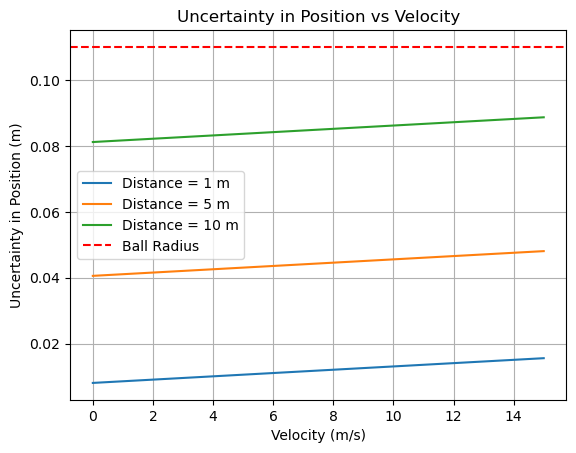

In [129]:
plot_uncertainty_vs_velocity(uncertainty_in_pixels, pixel_width, focal_length, 1, time_interval)
plot_uncertainty_vs_velocity(uncertainty_in_pixels, pixel_width, focal_length, 5, time_interval)
plot_uncertainty_vs_velocity(uncertainty_in_pixels, pixel_width, focal_length, 10, time_interval)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.legend()

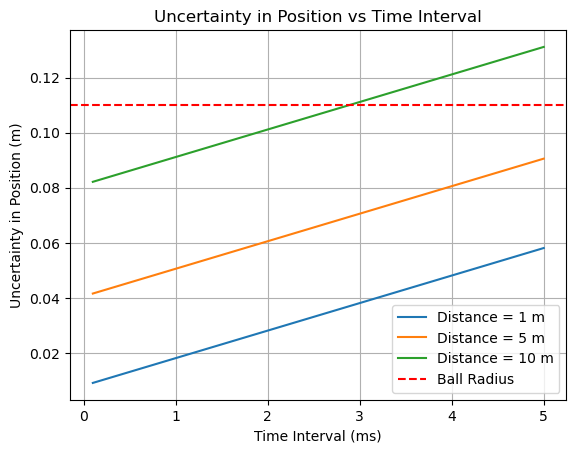

In [130]:
plot_uncertainty_vs_time_interval(uncertainty_in_pixels, pixel_width, focal_length, 1, velocity)
plot_uncertainty_vs_time_interval(uncertainty_in_pixels, pixel_width, focal_length, 5, velocity)
plot_uncertainty_vs_time_interval(uncertainty_in_pixels, pixel_width, focal_length, 10, velocity)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.legend()

In [118]:
distance = 5
velocity = 10
time_interval = 0.001
error_pixels = 4*1.3
size_per_pixel = calculate_pixel_real_world_size(pixel_width, focal_length, distance)
uncertainty_in_meters = error_pixels * size_per_pixel
uncertainty_position = calculate_uncertainty_for_position(velocity, time_interval, uncertainty_in_meters)
print(f"Uncertainty in position: {uncertainty_position:.6f} meters")

Uncertainty in position: 0.025795 meters


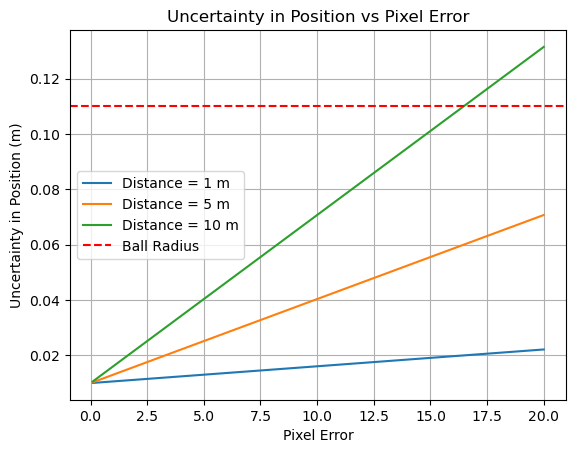

In [170]:
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, 1, velocity, 0.001)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, 5, velocity, 0.001)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, 10, velocity, 0.001)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.legend()

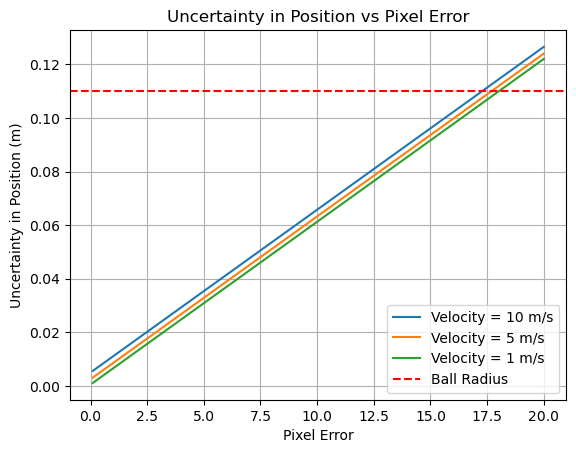

In [132]:
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, 10, time_interval)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, 5, time_interval)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, 1, time_interval)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.legend()

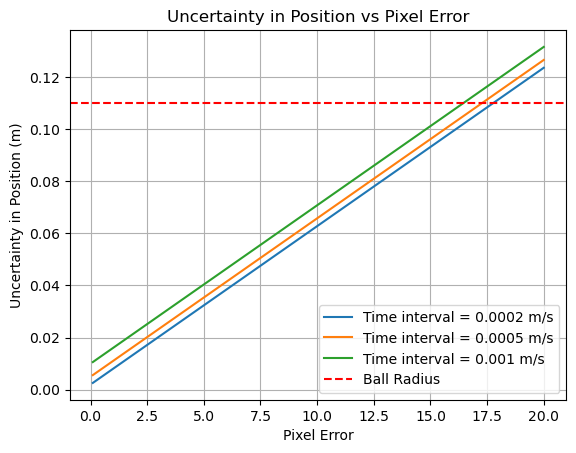

In [ ]:
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, velocity, 0.0002)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, velocity, 0.0005)
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, velocity, 0.001)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.legend()

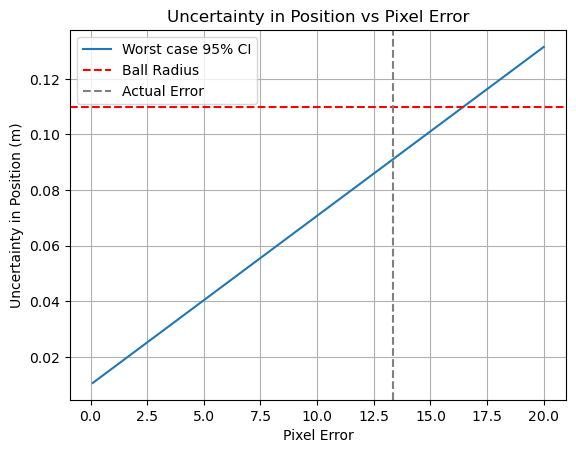

In [176]:
plot_uncertainty_vs_pixel_error(pixel_width, focal_length, distance, velocity, 0.001)
# Plot ball radius
plt.axhline(y=BALL_RADIUS, color='r', linestyle='--', label='Ball Radius')
plt.axvline(x=13.354, color='gray', linestyle='--', label='Actual Error')
plt.legend()

# Trajectory Uncertainty

In [ ]:
from simulator import Camera
def uncertainty_distance_with_radius(focal_length, ball_radius, delta_ball_radius, pixel_radius, delta_pixel_radius):
    """
    Calculate the uncertainty in distance based on the uncertainty in ball radius and pixel radius.

    Parameters:
    focal_length (float): Focal length of the camera in meters.
    ball_radius (float): Radius of the ball in meters.
    delta_ball_radius (float): Uncertainty in ball radius in meters.
    pixel_radius (float): Radius of the ball in pixels.
    delta_pixel_radius (float): Uncertainty in pixel radius in meters.

    Returns:
    float: Uncertainty in distance in meters.
    """
    # Calculate the uncertainty in distance using the formula
    image_radius = pixel_radius * pixel_width
    delta_image_radius = delta_pixel_radius * pixel_width
    delta_distance = ((focal_length * delta_ball_radius) / image_radius) + ((focal_length * ball_radius * delta_image_radius) / image_radius**2)
    return delta_distance

def uncertainty_distance_with_two_cameras(focal_length, position_camera1, position_camera2, delta_pos1, delta_pos2, x_img_px1, x_img_px2, delta_x_img_px1, delta_x_img_px2):
    """
    Calculate the uncertainty in distance based on the uncertainty in positions of two cameras.

    Parameters:
    focal_length (float): Focal length of the camera in meters.
    position_camera1 (float): Position of camera 1 in meters.
    position_camera2 (float): Position of camera 2 in meters.
    delta_pos1 (float): Uncertainty in position of camera 1 in meters.
    delta_pos2 (float): Uncertainty in position of camera 2 in meters.
    x_img1 (float): Image coordinate of object in camera 1.
    x_img2 (float): Image coordinate of object in camera 2.

    Returns:
    float: Uncertainty in distance in meters.
    """
    x_img1 = x_img_px1 * pixel_width
    x_img2 = x_img_px2 * pixel_width
    delta_x_img1 = delta_x_img_px1 * pixel_width
    delta_x_img2 = delta_x_img_px2 * pixel_width
    print('Uncertainty distance calculation', x_img1, x_img2, delta_x_img1, delta_x_img2)
    # Calculate the uncertainty in distance using the formula
    delta_distance = focal_length / (x_img1 - x_img2) * (delta_pos1 + delta_pos2) + (focal_length * (np.linalg.norm(position_camera2 - position_camera1)) / (x_img1 - x_img2)**2) * (delta_x_img1 + delta_x_img2)
    return delta_distance

def uncertainty_world_coord(distance, delta_distance, coord_img_px, delta_coord_img_px):
    """
    Calculate the uncertainty in world coordinates based on the uncertainty in image coordinates.

    Parameters:
    distance (float): Distance to the object in meters.
    delta_distance (float): Uncertainty in distance in meters.
    coord_img_px (float): Image coordinate of object in x direction.
    delta_coord_img_px (float): Uncertainty in image coordinate in x direction.

    Returns:
    float: Uncertainty in world coordinates in meters.
    """
    # print('delta_distance', len(delta_distance))
    # print('coord_img_px', len(coord_img_px))
    # print('delta_coord_img_px', len(delta_coord_img_px))
    coord_img = coord_img_px * pixel_width
    delta_coord_img = delta_coord_img_px * pixel_width
    # Calculate the uncertainty in z-coordinate using the formula
    delta_world = (distance / focal_length -1) * delta_coord_img + coord_img/focal_length * delta_distance
    return delta_world

def uncertainty_X(theta, delta_theta, x_world, delta_x_world, distance, delta_distance, delta_x_cam):
    """
    Calculate the uncertainty in x and y coordinates based on the uncertainty in angle and image coordinates.

    Parameters:
    theta (float): Angle in radians.
    delta_theta (float): Uncertainty in angle in radians.
    delta_x_img_px (float): Image coordinate of object in x direction.
    delta_x_world (float): Uncertainty in image coordinate in x direction.
    distance (float): Distance to the object in meters.
    delta_distance (float): Uncertainty in distance in meters.
    delta_x_img_px (float): Uncertainty in image coordinate in x direction.

    Returns:
    float: Uncertainty in X coordinate in meters.
    """
    delta_X = delta_x_cam + np.sin(theta) * delta_distance +   np.cos(theta) * delta_x_world + (distance * np.cos(theta) + x_world * np.sin(theta)) * delta_theta
    return delta_X

def uncertainty_Y(theta, delta_theta, x_world, delta_x_world, distance, delta_distance, delta_y_cam):
    """
    Calculate the uncertainty in x and y coordinates based on the uncertainty in angle and image coordinates.

    Parameters:
    theta (float): Angle in radians.
    delta_theta (float): Uncertainty in angle in radians.
    delta_y_img_px (float): Image coordinate of object in y direction.
    delta_y_world (float): Uncertainty in image coordinate in y direction.
    distance (float): Distance to the object in meters.
    delta_distance (float): Uncertainty in distance in meters.
    delta_y_img_px (float): Uncertainty in image coordinate in y direction.

    Returns:
    float: Uncertainty in Y coordinate in meters.
    """
    delta_Y = delta_y_cam + np.cos(theta) * delta_distance + np.sin(theta) * delta_x_world + (distance * np.sin(theta) - x_world * np.cos(theta)) * delta_theta
    return delta_Y

def uncertainty_Z(delta_y_world, delta_z_cam):
    """
    Calculate the uncertainty in Z coordinate based on the uncertainty in y coordinate.

    Parameters:
    y_world (float): World coordinate in y direction.
    delta_y_world (float): Uncertainty in world coordinate in y direction.
    z_cam (float): Camera coordinate in z direction.
    delta_z_cam (float): Uncertainty in camera coordinate in z direction.

    Returns:
    float: Uncertainty in Z coordinate in meters.
    """
    delta_Z = delta_z_cam + delta_y_world
    return delta_Z


def uncertainty_position(focal_length, distance, pos_camera, delta_pos_camera, theta, delta_theta, x_img_px, delta_x_img_px, y_img_px, delta_y_img_px, radius_px = None, delta_radius_px = None, radius = None, delta_radius = None, x_img_px2 = None, delta_x_img_px2 = None, pos_camera2 = None, delta_pos_camera2 = None, n_cameras=1):
    """
    Calculate the uncertainty in position based on the uncertainties in x, y, and z coordinates.

    Parameters:
    delta_x (float): Uncertainty in x coordinate in meters.
    delta_y (float): Uncertainty in y coordinate in meters.
    delta_z (float): Uncertainty in z coordinate in meters.
    """
    # Delta distance
    if n_cameras == 1:
        if radius is not None and delta_radius is not None and radius_px is not None and delta_radius_px is not None:
            delta_distance = uncertainty_distance_with_radius(focal_length, radius, delta_radius, radius_px, delta_radius_px)
        else:
            raise ValueError("Ball radius parameters must be provided for one camera.")
    elif n_cameras == 2:
        if pos_camera2 is not None and delta_pos_camera2 is not None and x_img_px2 is not None and delta_x_img_px2 is not None:
            delta_distance = uncertainty_distance_with_two_cameras(focal_length, pos_camera, pos_camera2, delta_pos_camera, delta_pos_camera2, x_img_px, x_img_px2, delta_x_img_px, delta_x_img_px2)
        else:
            raise ValueError("Second camera parameters must be provided for two cameras.")
    else:
        raise ValueError("Number of cameras must be 1 or 2.")
    print('Delta distance', delta_distance)
    # World coordinates
    px_world = calculate_pixel_real_world_size(pixel_width, focal_length, distance)
    x_world = x_img_px * px_world
    y_world = y_img_px * px_world
    print(x_world, y_world)
    delta_x_world = uncertainty_world_coord(distance, delta_distance, x_img_px, delta_x_img_px)
    delta_y_world = uncertainty_world_coord(distance, delta_distance, y_img_px, delta_y_img_px)
    print('Deltas', delta_x_world, delta_y_world)
    # 3D coordinates
    delta_x = uncertainty_X(theta, delta_theta, x_world, delta_x_world, distance, delta_distance, pos_camera[0])
    delta_y = uncertainty_Y(theta, delta_theta, x_world, delta_x_world, distance, delta_distance, pos_camera[1])
    delta_z = uncertainty_Z(delta_y_world, pos_camera[2])
    

    return np.array([delta_x, delta_y, delta_z])

def uncertainty_velocity(delta_r, delta_t):
    """
    Calculate the uncertainty in velocity based on the uncertainties in position and time.

    Parameters:
    delta_x (float): Uncertainty in x coordinate in meters.
    delta_y (float): Uncertainty in y coordinate in meters.
    delta_z (float): Uncertainty in z coordinate in meters.
    delta_t (float): Uncertainty in time in seconds.

    Returns:
    np.array: Uncertainty in velocity in meters per second.
    """
    delta_v = 2 * delta_r / delta_t
    return delta_v

def uncertainty_position_for_t_flight(delta_r, v, delta_v, t, delta_t):
    """
    Calculate the uncertainty in trajectory based on the uncertainties in position, velocity, and time.

    Parameters:
    delta_r (float): Uncertainty in position in meters.
    delta_v (float): Uncertainty in velocity in meters per second.
    delta_t (float): Uncertainty in time in seconds.

    Returns:
    np.array: Uncertainty in trajectory in meters.
    """
    g = np.array([0, 0, -9.81])  # Gravitational acceleration vector
    delta_r_for_t = delta_r + delta_v * t + (v + g * t) * delta_t
    return delta_r_for_t

def get_img_coords(obj_position, camera_position, focal_length, distance, theta):
    """
    Calculate the image coordinates of an object based on its position and the camera's position.

    Parameters:
    obj_position (np.array): Position of the object in 3D space.
    camera_position (np.array): Position of the camera in 3D space.
    focal_length (float): Focal length of the camera in meters.

    Returns:
    np.array: Image coordinates of the object in pixels.
    """
    # Calculate the image coordinates using the pinhole camera model
    camera = Camera(camera_position, np.array([0, theta + np.pi / 2]), focal_length, 1280, 720)
    img_pos, z_img = camera.project_point(obj_position)
    x_img, y_img = img_pos[0], img_pos[1]
    print(z_img, obj_position[2])
    print(x_img, y_img)
    return np.array([x_img, y_img])

In [57]:
pixel_width = 4.86e-6  # m
focal_length = 0.008   # m
velocity = np.array([7.07, 0, 7.07])
time_interval = 0.001
uncertainty_in_pixels = 6.68*2
theta = np.deg2rad(0)
obj_position = np.array([6, 5, 1])
# obj_position = np.array([2, 5, 1])
d_between_cameras = 1
camera_position1 = np.array([7, 0, 0.5])
camera_position2 = camera_position1 + d_between_cameras * np.array([np.cos(theta), np.sin(theta), 0])
delta_camera_pos = 0.2
delta_theta = np.deg2rad(5)
distance = 5 # This is hardcoded, I should change it to the distance between the object plane and the plane of the cameras

x_img_px1, y_img_px1 = get_img_coords(obj_position, camera_position1, focal_length, distance, theta)
x_img_px2, y_img_px2 = get_img_coords(obj_position, camera_position2, focal_length, distance, theta)

delta_r = uncertainty_position(focal_length, distance, camera_position1, delta_camera_pos, theta, delta_theta, x_img_px1, uncertainty_in_pixels, y_img_px1, uncertainty_in_pixels, x_img_px2=x_img_px2, delta_x_img_px2 = uncertainty_in_pixels, pos_camera2=camera_position2, delta_pos_camera2=delta_camera_pos, n_cameras=2)

print("Uncertainty in position:", delta_r)
delta_v = uncertainty_velocity(delta_r, time_interval)
print("Uncertainty in velocity:", delta_v)


time = 2
delta_r_for_t = uncertainty_position_for_t_flight(delta_r, velocity, delta_v, time, time_interval) 
print("Uncertainty in trajectory for t_flight:", delta_r_for_t)
# time = np.linspace(0, 2, 100)
# deltas = []
# for i in range(len(time)):
#     delta_r = uncertainty_position_for_t_flight(delta_r, velocity, delta_v, time[i], time_interval)
#     deltas.append(np.linalg.norm(delta_r))
# deltas = np.array(deltas)
# plt.plot(time, deltas)

Camera coordinates: [-1.   5.   0.5  1. ], Projected coordinates: (-0.0016, 0.0008)
5.0 1
310 195
Camera coordinates: [-2.   5.   0.5  1. ], Projected coordinates: (-0.0032000000000000006, 0.0008000000000000001)
4.999999999999999 1
-18 195
Uncertainty distance calculation 0.0015066 -8.748e-05 6.49296e-05 6.49296e-05
Delta distance 2.416257224902872
0.9416249999999999 0.5923125
Deltas 0.4955577122798335 0.32675194190505646
Uncertainty in position: [7.93189003 2.33408494 0.82675194]
Uncertainty in velocity: [15863.78005056  4668.16988411  1653.50388381]
Uncertainty in trajectory for t_flight: [31735.49906114  9338.67385317  3307.82196956]


In [58]:
time = 2
delta_r_for_t = uncertainty_position_for_t_flight(delta_r, velocity, np.array([5, 5, 5]), time, time_interval) 
print("Uncertainty in trajectory for t_flight:", delta_r_for_t)

Uncertainty in trajectory for t_flight: [17.93896003 12.33408494 10.81420194]


In [54]:
g = np.array([0, 0, -9.81])
(velocity + g * time) * time_interval

array([ 0.00707,  0.     , -0.01255])

In [50]:
1/time_interval

1000.0

In [ ]:
def uncertainty_position_for_t_flight(delta_r, v, delta_v, t, delta_t):
    """
    Calculate the uncertainty in trajectory based on the uncertainties in position, velocity, and time.

    Parameters:
    delta_r (float): Uncertainty in position in meters.
    delta_v (float): Uncertainty in velocity in meters per second.
    delta_t (float): Uncertainty in time in seconds.

    Returns:
    np.array: Uncertainty in trajectory in meters.
    """
    g = np.array([0, 0, -9.81])  # Gravitational acceleration vector
    delta_r_for_t = delta_r + delta_v * t + (v + g * t) * delta_t
    return delta_r_for_t

[[ 1.0000000e+00  6.1232340e-17 -0.0000000e+00  0.0000000e+00]
 [-6.1232340e-17  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [-7.0000000e+00 -4.2862638e-16 -5.0000000e-01  1.0000000e+00]]
[[ 1.0000000e+00  6.1232340e-17 -0.0000000e+00  0.0000000e+00]
 [-6.1232340e-17  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [-8.0000000e+00 -4.8985872e-16 -5.0000000e-01  1.0000000e+00]]
Camera coordinates: [-2.   5.   0.5  1. ], Projected coordinates: (-0.0032000000000000006, 0.0008000000000000001)


((-18, 195), np.float64(4.999999999999999))

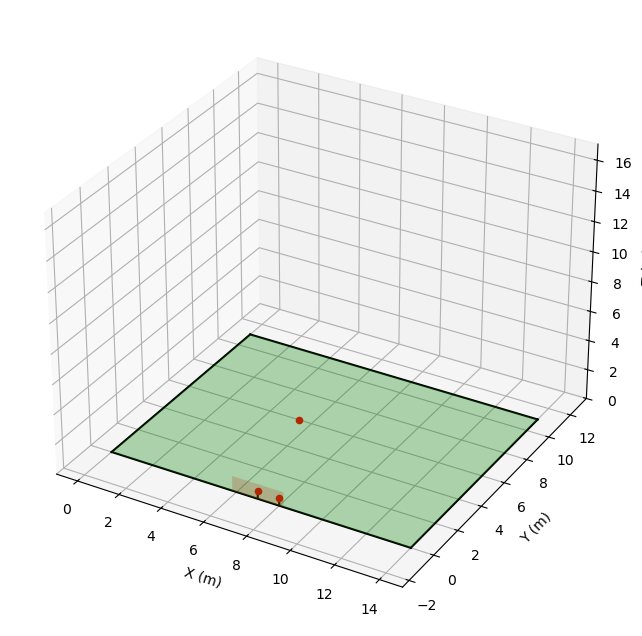

In [24]:

W = 14.0      # field width (m)
L = 11.0       # field length (m)

field = Field(W, L, 2.4, 1)

fig, ax = field.plot()

theta = np.deg2rad(0)
obj_position = np.array([6, 5, 1])
# obj_position = np.array([2, 5, 1])
d_between_cameras = 1
camera_position1 = np.array([7, 0, 0.5])
camera_position2 = camera_position1 + d_between_cameras * np.array([np.cos(theta), np.sin(theta), 0])
camera1 = Camera(camera_position1, np.array([0, theta + np.pi / 2]), focal_length, 1280, 720, pixel_width)
camera2 = Camera(camera_position2, np.array([0, theta + np.pi / 2]), focal_length, 1280, 720, pixel_width)
camera1.plot(ax)
camera2.plot(ax)
print(camera1.T)
print(camera2.T)

ax.scatter(*obj_position, c='r', label='Object')
# camera1.project_point(obj_position)
camera2.project_point(obj_position)